<a href="https://colab.research.google.com/github/alison1d3rland/HackHers2017-QueueCall/blob/master/SpotifyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install spotipy numpy pandas matplotlib seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.8/237.8 KB 13.5 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import json

In [ ]:
# credentials = json.load(open('authorization.json'))
# client_id = credentials['client_id']
# client_secret = credentials['client_secret']
client_id = '9edcd1a862ea4eba9df48424c54d8049'
client_secret = 'efcde76a19b94ff18dc7135c2611777e'

playlist_index = 0
playlist_uri = 'spotify:user:Test_1:playlist:4XDIOEONtJPr7WeM0WDekk'
like = 'true'

# playlists = json.load(open('playlists_like_dislike.json'))
# playlist_uri = playlists[playlist_index]['uri']
# like = playlists[playlist_index]['like']

In [ ]:
client_credentials_manager = SpotifyClientCredentials(client_id=client_id,client_secret=client_secret)

sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [ ]:
uri = playlist_uri    # the URI is split by ':' to get the username and playlist ID
username = uri.split(':')[2]
playlist_id = uri.split(':')[4]

In [ ]:
# Ignore all "Coulnd't read cache at: .cache --- this is because we are on an ephemeral docker container
results = sp.user_playlist(username, playlist_id, 'tracks')

In [ ]:
playlist_tracks_data = results['tracks']
playlist_tracks_id = []
playlist_tracks_titles = []
playlist_tracks_artists = []
playlist_tracks_first_artists = []

for track in playlist_tracks_data['items']:
    playlist_tracks_id.append(track['track']['id'])
    playlist_tracks_titles.append(track['track']['name'])
    # adds a list of all artists involved in the song to the list of artists for the playlist
    artist_list = []
    for artist in track['track']['artists']:
        artist_list.append(artist['name'])
    playlist_tracks_artists.append(artist_list)
    playlist_tracks_first_artists.append(artist_list[0])

In [ ]:
features = sp.audio_features(playlist_tracks_id)

In [ ]:
features

[{'danceability': 0.646,
  'energy': 0.696,
  'key': 1,
  'loudness': -6.505,
  'mode': 1,
  'speechiness': 0.065,
  'acousticness': 0.113,
  'instrumentalness': 0,
  'liveness': 0.115,
  'valence': 0.18,
  'tempo': 81.336,
  'type': 'audio_features',
  'id': '0KS2h61pHQ4WmOwruD7uxD',
  'uri': 'spotify:track:0KS2h61pHQ4WmOwruD7uxD',
  'track_href': 'https://api.spotify.com/v1/tracks/0KS2h61pHQ4WmOwruD7uxD',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/0KS2h61pHQ4WmOwruD7uxD',
  'duration_ms': 223415,
  'time_signature': 4},
 {'danceability': 0.535,
  'energy': 0.388,
  'key': 7,
  'loudness': -9.805,
  'mode': 0,
  'speechiness': 0.155,
  'acousticness': 0.507,
  'instrumentalness': 0,
  'liveness': 0.11,
  'valence': 0.412,
  'tempo': 106.703,
  'type': 'audio_features',
  'id': '5dXWFMwD7I7zXsInONVl0H',
  'uri': 'spotify:track:5dXWFMwD7I7zXsInONVl0H',
  'track_href': 'https://api.spotify.com/v1/tracks/5dXWFMwD7I7zXsInONVl0H',
  'analysis_url': 'https://api.spotify.com

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
features_df = pd.DataFrame(data=features, columns=features[0].keys())

In [ ]:
features_df['title'] = playlist_tracks_titles
features_df['first_artist'] = playlist_tracks_first_artists
features_df['all_artists'] = playlist_tracks_artists
#features_df = features_df.set_index('id')
features_df = features_df[['id', 'title', 'first_artist', 'all_artists',
                           'danceability', 'energy', 'key', 'loudness',
                           'mode', 'acousticness', 'instrumentalness',
                           'liveness', 'valence', 'tempo',
                           'duration_ms', 'time_signature']]
features_df.tail()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
7,2yOm4lN7aTygtXanJFNFWU,"Any Time, Any Place",Janet Jackson,[Janet Jackson],0.571,0.232,10,-11.309,1,0.604,0.000246,0.1190,0.207,128.785,428200,4
8,31yoNL3A318KMhaaaBDbME,Good Morning Gorgeous,Mary J. Blige,[Mary J. Blige],0.519,0.562,1,-6.736,1,0.233,0.000000,0.0669,0.331,131.552,174530,3
9,4JehYebiI9JE8sR8MisGVb,Halo,Beyoncé,[Beyoncé],0.508,0.720,11,-5.908,0,0.272,0.000000,0.0563,0.472,79.983,261640,4
10,34gCuhDGsG4bRPIf9bb02f,Thinking out Loud,Ed Sheeran,[Ed Sheeran],0.781,0.445,2,-6.061,1,0.474,0.000000,0.1840,0.591,78.998,281560,4
11,0tgVpDi06FyKpA1z0VMD4v,Perfect,Ed Sheeran,[Ed Sheeran],0.599,0.448,8,-6.312,1,0.163,0.000000,0.1060,0.168,95.050,263400,3


In [ ]:
features_df.to_csv("./mysongs.csv")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text major ticklabel objects>)

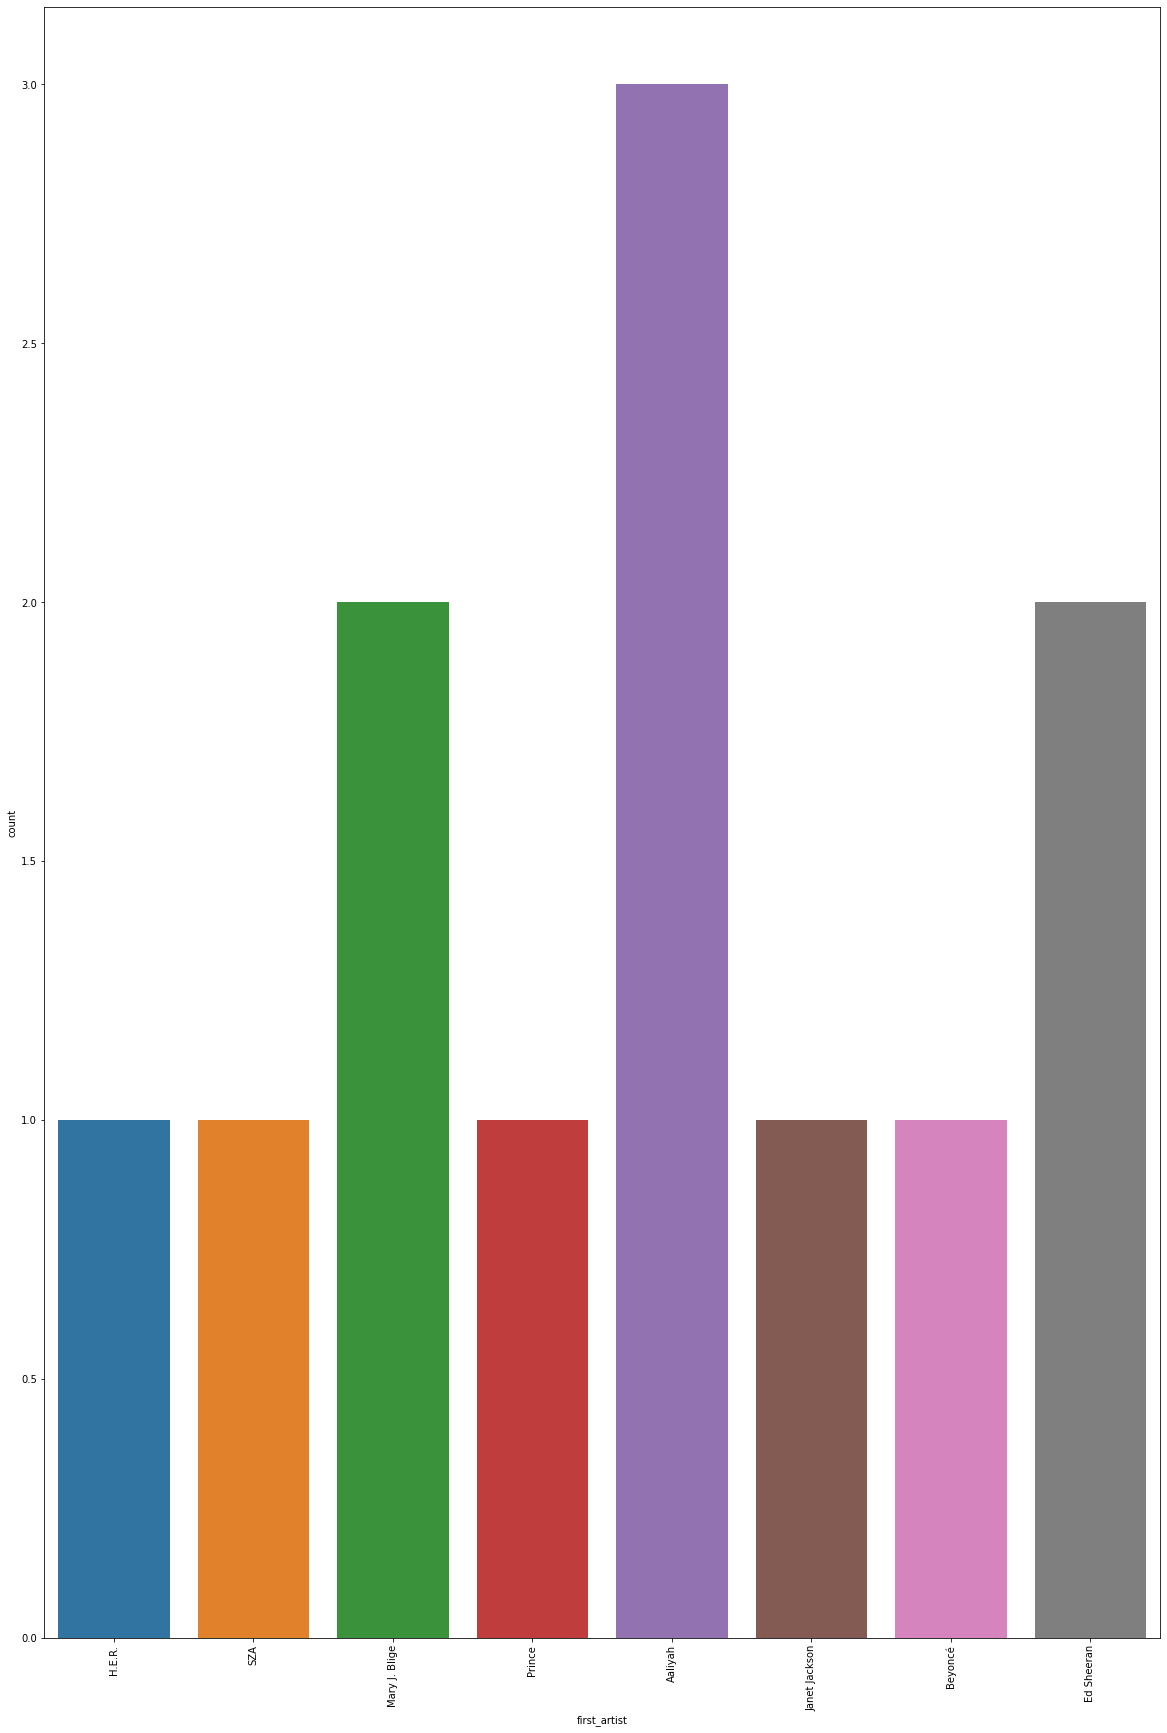

In [ ]:
plt.figure(figsize=(20,30))
sns.countplot(features_df['first_artist'])
plt.xticks(rotation=90)

In [ ]:
#features_df = features_df.drop(['first_artist', 'all_artists'], axis=1)

In [ ]:
num_bars = []
num_sections = []
num_segments = []

for i in range(0,len(features_df['id'])):
    analysis = sp.audio_analysis(features_df.iloc[i]['id'])
    num_bars.append(len(analysis['bars'])) # beats/time_signature
    num_sections.append(len(analysis['sections']))
    num_segments.append(len(analysis['segments']))

Text(0.5, 0, 'num_segments')

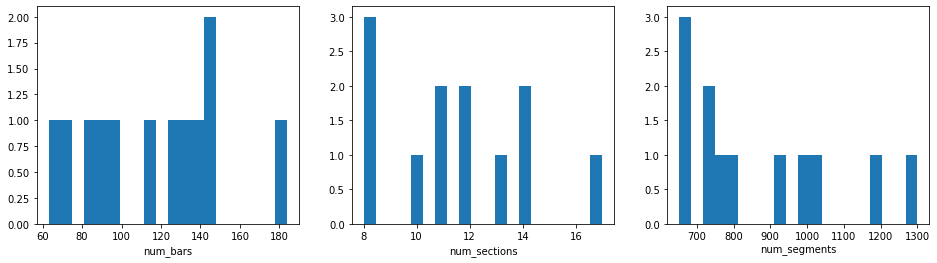

In [ ]:
plt.figure(figsize=(16,4))
plt.subplot(1,3,1)
plt.hist(num_bars, bins=20)
plt.xlabel('num_bars')
plt.subplot(1,3,2)
plt.hist(num_sections, bins=20)
plt.xlabel('num_sections')
plt.subplot(1,3,3)
plt.hist(num_segments, bins=20)
plt.xlabel('num_segments')

In [ ]:
features_df['num_bars'] = num_bars
features_df['num_sections'] = num_sections
features_df['num_segments'] = num_segments
features_df.head()

,id,title,first_artist,all_artists,danceability,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_bars,num_sections,num_segments
0,0KS2h61pHQ4WmOwruD7uxD,Damage,H.E.R.,[H.E.R.],0.646,0.696,1,-6.505,1,0.1130,0.000000,0.1150,0.180,81.336,223415,4,74,8,737
1,5dXWFMwD7I7zXsInONVl0H,I Hate U,SZA,[SZA],0.535,0.388,7,-9.805,0,0.5070,0.000000,0.1100,0.412,106.703,174000,5,63,8,651
2,0I5mUa3CZPcsrWwlUmTWkV,I'm Goin' Down,Mary J. Blige,[Mary J. Blige],0.572,0.324,0,-9.297,1,0.7370,0.000000,0.1240,0.234,94.048,222333,3,115,11,656
3,70Ukvwcp6LkgfRiuUhGV7l,Nothing Compares 2 U,Prince,[Prince],0.519,0.563,11,-5.040,1,0.0952,0.000070,0.0895,0.345,124.020,280743,4,142,14,748
4,6gdhHMWUv1pvkOHqCUGvCp,One In A Million,Aaliyah,[Aaliyah],0.741,0.508,11,-5.099,0,0.0347,0.000064,0.0602,0.354,121.965,270760,4,136,13,997


In [ ]:
features_df.to_csv("playlist_" + str(playlist_index) + ".csv", encoding='utf-8',index="false")

### Part II:  Pulling Track Information

In [ ]:
playlist_link = "https://open.spotify.com/playlist/4XDIOEONtJPr7WeM0WDekk?si=acd8e7ce14a04950"
playlist_URI = playlist_link.split("/")[-1].split("?")[0]
track_uris = [x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"]]

In [ ]:
for track in sp.playlist_tracks(playlist_URI)["items"]:
    #URI
    track_uri = track["track"]["uri"]

    #Track name
    track_name = track["track"]["name"]

    #Main Artist
    artist_uri = track["track"]["artists"][0]["uri"]
    artist_info = sp.artist(artist_uri)

    #Name, popularity, genre
    artist_name = track["track"]["artists"][0]["name"]
    artist_pop = artist_info["popularity"]
    artist_genres = artist_info["genres"]

    #Album
    album = track["track"]["album"]["name"]

    #Popularity of the track
    track_pop = track["track"]["popularity"]

In [ ]:
sp.audio_features(track_uri)[0]